In [1]:
 # handling warnings and not displaying 'em
import warnings
warnings.filterwarnings('ignore')

In [2]:
# installing python software packages
!pip install sentence_transformers
!pip install scikit-plot

     ---------------------------------------- 86.0/86.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.1/1.1 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 977.5/977.5 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 192.3/192.3 MB 2.0 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125960 sha256=d19f184a62a4808d65be946ababcf75464f564385b79adf99d3afcc382b167a1
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\0a\f5\dd\9d00836c4e9e279c2a59d5b0ab72dafa66cbc626a327c550dd
Successfully built sentence_transformers
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.12.1


In [47]:
# importing several important and useful libraries
import numpy as np
import pandas as pd
import sentence_transformers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import scikitplot.plotters as skplt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.svm import SVC
import re
import string

In [4]:
df=pd.read_csv('Hotels Dataset.csv')

In [5]:
df.head()

,label,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [7]:
df.shape

(1600, 5)

In [9]:
df['label'].value_counts()

truthful     800
deceptive    800
Name: label, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     1600 non-null   object
 1   hotel     1600 non-null   object
 2   polarity  1600 non-null   object
 3   source    1600 non-null   object
 4   text      1600 non-null   object
dtypes: object(5)
memory usage: 62.6+ KB


In [11]:
df.isna().sum()

label       0
hotel       0
polarity    0
source      0
text        0
dtype: int64

In [12]:
random_state=42

In [13]:
# reseting indexes (in case altered by dropnan)
df.reset_index(inplace=True, drop=True)

In [18]:
# spliting as train/ test data
split = int(df.shape[0] * 0.8)
df_train = df.iloc[:split, :].reset_index(drop=True)
df_test = df.iloc[split:, :].reset_index(drop=True)

In [19]:
# train/ test examples count in that order
print(df_train.shape, df_test.shape)

(1280, 5) (320, 5)


In [20]:
# loading the BERT model
bert_model = sentence_transformers.SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [22]:
# generatings word embeddings for training data
train_comment_embeddings = bert_model.encode(df_train['text'])
# writing embeddings file given location
np.save(r'C:\Users\User\CodeWithHarry\xtrnH.npy',train_comment_embeddings)

In [23]:
# generating word embeddings for test data and storing the file to given location
test_comment_embeddings = bert_model.encode(df_test['text'])
np.save(r'C:\Users\User\CodeWithHarry\xtstH.npy',test_comment_embeddings)

In [33]:
# generating and storing the embeddings for corresponding train/ test labels
np.save(r'C:\Users\User\CodeWithHarry\ytrnH.npy',np.array(df_train['label']))
np.save(r'C:\Users\User\CodeWithHarry\ytstH.npy',np.array(df_test['label']))

In [34]:
# defining confusion matrix : prediction against test labels 
def plot_cmat(ytstH, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(ytstH,ypred)
    plt.show()

In [35]:
# loading train/ test text embeddings in these variables
xtrain=np.load(r'C:\Users\User\CodeWithHarry\xtrnH.npy')
xtest=np.load(r'C:\Users\User\CodeWithHarry\xtstH.npy')

In [36]:
# loading train/ test labels' embeddings in these variables
ytest=np.load(r'C:\Users\User\CodeWithHarry\ytstH.npy',allow_pickle=True)
ytrain=np.load(r'C:\Users\User\CodeWithHarry\ytrnH.npy',allow_pickle=True)

In [37]:
#numpy array
ytest.shape

(320,)

In [38]:
print(xtrain.shape)
print(ytrain.shape)

(1280, 768)
(1280,)


In [39]:
import pickle

Accuracy =59.062500%
              precision    recall  f1-score   support

   deceptive       1.00      0.59      0.74       320
    truthful       0.00      0.00      0.00         0

    accuracy                           0.59       320
   macro avg       0.50      0.30      0.37       320
weighted avg       1.00      0.59      0.74       320



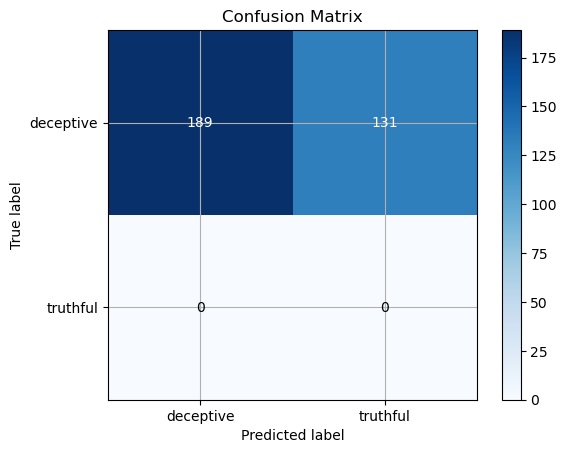

In [40]:
#Applying SVM a machine learning model
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(xtrain, ytrain)
y_pred = svclassifier.predict(xtest)

a=ytest.shape[0]
b=(ytest!=y_pred).sum()

print("Accuracy ="+format((a-b)/a*100,'2f')+"%")
print(classification_report(ytest, y_pred))
plot_cmat(ytest, y_pred)


In [46]:
pickle.dump(svclassifier, open(r'C:\Users\User\CodeWithHarry\svc.model', 'wb'))

In [48]:
#Inferencing Part Starts here!

In [49]:
df2=pd.read_csv('User_Reviews.csv')

In [50]:
df2.head()

,user_id,text
0,204,We stayed for a one night getaway with family ...
1,345,Triple A rate with upgrade to view room was le...
2,425,This comes a little late as I'm finally catchi...
3,589,The Omni Chicago really delivers on all fronts...
4,679,I asked for a high floor away from the elevato...


In [53]:
xnew = bert_model.encode(df2['text'])

In [56]:
with open(r'C:\Users\User\CodeWithHarry\svc.model', 'rb') as f:
    clf = pickle.load(f)
    y_pred=clf.predict(xnew)
    print( y_pred)
  

['truthful' 'truthful' 'truthful' 'truthful' 'truthful' 'deceptive'
 'deceptive' 'deceptive' 'deceptive' 'deceptive']
